In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from neurasort.bio482.helpers import Function_Detect_APs

In [2]:
raw_data = pd.read_pickle("data_bio482.pkl")

In [3]:
questionable_predictors = [
    "Cell_Counter", "Cell_ID", "Cell_TargetedBrainArea", "Cell_tdTomatoExpressing", "Mouse_DateOfBirth",
    'Cell_tdTomatoExpressing', 'Mouse_DateOfBirth', 'Mouse_Genotype',
       'Mouse_Name', 'Mouse_Sex', 'Sweep_ActiveContactTimes', 'Sweep_Counter',
       'Sweep_MembranePotential_SamplingRate', 'Sweep_PassiveContactTimes',
       
]

In [4]:
raw_data.columns

Index(['Cell_APThreshold_Slope', 'Cell_Anatomy', 'Cell_Counter', 'Cell_Depth',
       'Cell_ID', 'Cell_Layer', 'Cell_TargetedBrainArea', 'Cell_Type',
       'Cell_tdTomatoExpressing', 'Mouse_DateOfBirth', 'Mouse_Genotype',
       'Mouse_Name', 'Mouse_Sex', 'Sweep_ActiveContactTimes', 'Sweep_Counter',
       'Sweep_MembranePotential', 'Sweep_MembranePotential_SamplingRate',
       'Sweep_PassiveContactTimes', 'Sweep_QuietTimes', 'Sweep_StartTime',
       'Sweep_Type', 'Sweep_WhiskerAngle', 'Sweep_WhiskerAngle_SamplingRate',
       'Sweep_WhiskingTimes'],
      dtype='object')

In [5]:
raw_data

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[4.347000000000001, 7.0390000000000015], [8.2...","[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,nan,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,nan,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,nan,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,nan,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [11]:
data_free_whisking = raw_data[raw_data['Sweep_Type']=='free whisking'] 
data_free_whisking

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
6,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,7.0,"[-0.042103125, -0.042128125, -0.04211875, -0.0...",20000.0,nan,"[[0.002, 2.39], [2.824, 3.82], [13.308, 20.0]]",2005.0,free whisking,"[2.089234284014367, 2.20210876250502, 2.109573...",100.0,"[[2.4, 2.578], [4.15, 10.344], [11.802, 13.302]]"
7,10.0,L2/3,1.0,350.0,SC902_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.056759375, -0.056709375, -0.056728125, -0....",20000.0,nan,"[[0.002, 1.072], [3.492, 6.14], [9.026, 9.994]...",2005.0,free whisking,"[3.458332944365708, 3.393550520339346, 3.76982...",100.0,"[[1.542, 2.01], [2.952, 3.49], [6.144, 8.732],..."
8,10.0,L2/3,1.0,350.0,SC902_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.05755, -0.057525, -0.05753125, -0.05748125...",20000.0,nan,"[[0.002, 0.102], [0.35, 1.772], [2.236, 2.8], ...",2005.0,free whisking,"[2.881587449928759, 2.810570137094487, 2.28166...",100.0,"[[2.806, 6.666], [12.332, 12.618], [14.17, 19...."
9,10.0,L2/3,1.0,350.0,SC902_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.050225, -0.050234375, -0.05020625, -0.0502...",20000.0,nan,"[[0.002, 0.018], [6.978, 9.112], [9.964, 10.0]]",2005.0,free whisking,"[14.983237242177864, 14.860202971079701, 15.63...",100.0,"[[0.02, 6.824], [9.676, 9.958]]"
13,10.0,L2/3,1.0,244.0,SC904_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.045740625, -0.04585, -0.045846875, -0.0458...",20000.0,nan,"[[0.002, 0.056], [0.802, 2.152], [3.59, 4.138]...",2005.0,free whisking,"[-4.778280115256763, -4.52540728696988, -4.253...",100.0,"[[2.94, 3.338], [4.142, 4.42], [5.66, 7.786], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,nan,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,nan,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,nan,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,nan,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [13]:
np.unique(data_free_whisking.Cell_ID).shape

(232,)

<Axes: xlabel='Cell_Type', ylabel='count'>

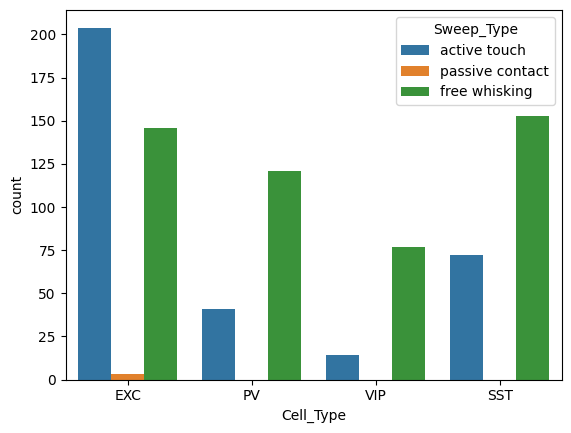

In [10]:
sns.countplot(
    # raw_data[raw_data.Sweep_Type != 'passive contact'],
    raw_data,
    x="Cell_Type",
    hue="Sweep_Type",
)

In [24]:
data_free_whisking.drop()

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
199,10.0,nan,1.0,360.0,TK112_1,L4,C2,PV,True,2013.0,...,1.0,"[-0.05438181178113901, -0.054388388981733975, ...",20000.0,nan,"[[0.002, 0.838], [1.238, 3.072], [4.22, 5.086]...",2013.0,free whisking,"[194.9515, 194.9515, 194.9515, 194.9515, 194.9...",100.0,"[[3.472, 3.652], [8.888, 10.816], [12.906, 13...."
200,20.0,nan,2.0,340.0,TK112_2,L2/3,C2,PV,True,2013.0,...,1.0,"[-0.04934039129792025, -0.04934039129792025, -...",20000.0,nan,"[[0.002, 1.076], [1.158, 1.922], [2.006, 3.182...",2013.0,free whisking,"[200.6095, 200.6095, 200.6095, 200.6095, 200.3...",100.0,"[[3.186, 3.434], [4.984, 5.63], [10.142, 10.30..."
201,15.0,nan,1.0,560.0,TK140_1,L5,C2,EXC,True,2013.0,...,1.0,"[-0.0625178194084906, -0.06251453079953906, -0...",20000.0,nan,"[[0.002, 0.994], [1.662, 3.008], [3.378, 15.06...",2013.0,free whisking,"[-159.6645, -159.3079, -159.3079, -159.3079, -...",100.0,"[[1.002, 1.556], [3.048, 3.374], [18.466, 18.6..."
202,15.0,nan,1.0,560.0,TK140_1,L5,C2,EXC,True,2013.0,...,2.0,"[-0.052204759099682974, -0.05215871872587397, ...",20000.0,nan,"[[0.002, 3.484], [9.54, 10.824], [11.204, 12.6...",2013.0,free whisking,"[196.8484, 196.8484, 196.8484, 196.8484, 196.8...",100.0,"[[3.676, 9.492], [10.824, 10.936], [12.734, 12..."
203,15.0,nan,1.0,560.0,TK140_1,L5,C2,EXC,True,2013.0,...,3.0,"[-0.052698048858286745, -0.05267831726656123, ...",20000.0,nan,"[[0.002, 5.31], [9.692, 10.358], [10.536, 16.5...",2013.0,free whisking,"[201.6685, 202.0237, 202.0237, 201.6685, 201.6...",100.0,"[[5.314, 9.66], [10.36, 10.534], [18.486, 18.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,nan,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,nan,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,nan,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,nan,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."
